In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sal_hike=pd.read_csv("E:/Ravi_ExcelR_Assignments/Simple Linear Regression/Salary_Data.csv")
sal_hike

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
sal_hike.columns

Index(['YearsExperience', 'Salary'], dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x19a016dcdf0>,
 'caps': [<matplotlib.lines.Line2D at 0x19a016f54f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19a016dca90>],
 'medians': [<matplotlib.lines.Line2D at 0x19a016f5b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x19a016f5e50>],
 'means': []}

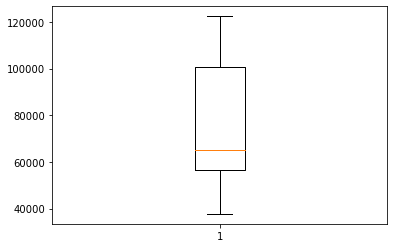

In [4]:
plt.boxplot(sal_hike["Salary"])

In [5]:
sal_hike.describe() 

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


(array([4., 2., 7., 4., 0., 2., 2., 2., 4., 3.]),
 array([ 37731.,  46197.,  54663.,  63129.,  71595.,  80061.,  88527.,
         96993., 105459., 113925., 122391.]),
 <a list of 10 Patch objects>)

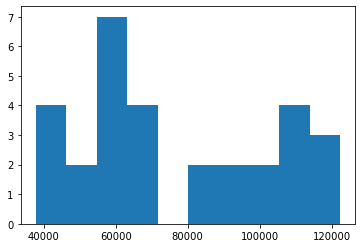

In [6]:
plt.hist(sal_hike["Salary"])

In [7]:
sal_hike.YearsExperience.corr(sal_hike.Salary)

0.9782416184887599

In [8]:
import statsmodels.formula.api as smf
model=smf.ols("YearsExperience~Salary",data=sal_hike).fit()
model.params

Intercept   -2.383161
Salary       0.000101
dtype: float64

In [9]:
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 09 Nov 2020   Prob (F-statistic):           1.14e-20
Time:                        10:14:10   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
Salary         0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
pred = model.predict(sal_hike.iloc[:,1])
pred

0      1.600934
1      2.295819
2      1.437694
3      2.024427
4      1.656428
5      3.352729
6      3.707969
7      3.130248
8      4.142905
9      3.408121
10     4.018652
11     3.266856
12     3.384628
13     3.397185
14     3.805285
15     4.496626
16     4.303310
17     6.030801
18     5.856117
19     7.129735
20     6.906748
21     7.568520
22     7.875253
23     9.142087
24     8.698442
25     8.308670
26     9.461782
27     9.022897
28    10.010845
29     9.958288
dtype: float64

In [11]:
rmse_lin = np.sqrt(np.mean((np.array(sal_hike['YearsExperience'])-np.array(pred))**2))
rmse_lin 

0.5788774181748744

Text(0, 0.5, 'YearsExperience')

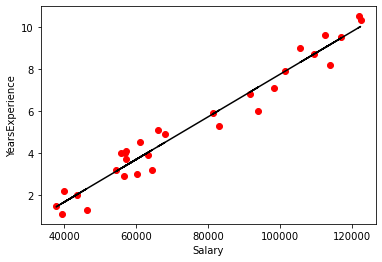

In [12]:
import matplotlib.pylab as plt
plt.scatter(x=sal_hike['Salary'],y=sal_hike['YearsExperience'],color='red')
plt.plot(sal_hike['Salary'],pred,color='black')
plt.xlabel('Salary')
plt.ylabel('YearsExperience')

In [13]:
salaryhike_resid = model.resid_pearson 
salaryhike_resid

array([-0.83601202, -1.6619283 ,  0.1039828 , -0.04076678,  0.90717063,
       -0.75556182, -1.18153318,  0.11640909, -1.5736192 ,  0.48711814,
       -0.19801879,  1.22354877,  1.02699848,  1.1729327 ,  1.15941355,
        0.67319349,  1.32960101, -1.21963712,  0.07323614, -1.88542188,
       -0.17815314, -0.78191494,  0.0413    , -1.5722537 ,  0.00260051,
        1.15376408,  0.06378169,  0.96313051,  0.48257285,  0.90406645])

Text(0, 0.5, 'Standardized Residual')

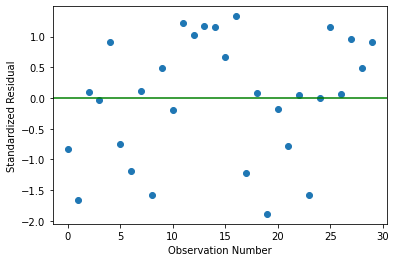

In [14]:
plt.plot(model.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

Text(0, 0.5, 'Actual')

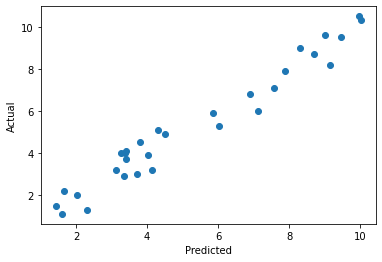

In [15]:
plt.scatter(x=pred,y=sal_hike.YearsExperience)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [16]:
model2=smf.ols("YearsExperience~np.log(Salary)",data=sal_hike).fit()
model2.params

Intercept        -77.696132
np.log(Salary)     7.428821
dtype: float64

In [17]:
model2.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Mon, 09 Nov 2020   Prob (F-statistic):           7.03e-18
Time:                        10:15:18   Log-Likelihood:                -33.035
No. Observations:                  30   AIC:                             70.07
Df Residuals:                      28   BIC:                             72.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -77.6961      4.241    -18.322      0.000     -86.383     -69.009
np.log(Salary)     7.4288      0.379     19.585      0.000       6.652       8.206
==============================================================================
Omnibus:                        1.748   Durbin-Watson:                   1.348
Prob(Omnibus):                  0.417   Jarque-Bera (JB):                1.213
Skew:                          -0.227   Prob(JB):                        0.545
Kurtosis:                       2.126   Cond. No.                         347.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""